# Exploring Star Wars Survey Data

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. The team surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). In this notebook, I'll be cleaning and exploring the data set.

## Data Overview

In [152]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
pd.set_option('display.max_columns', 500) #Prevent truncating columns
print(len(star_wars))
star_wars.head(10)

1187


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Retur

In [153]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data has several columns, including:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household` Income - The respondent's income
- `Education` - The respondent's education level
- `Location (Census Region)` - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

## Data Cleaning: `RespondentID`
I'll drop rows missing a respondent ID; as it is supposed to be a unique ID for each respondent, but it's blank in some rows.

In [154]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
print(len(star_wars))

#Only display part of dataframe necessary to confirm cleaning
star_wars[star_wars.columns[0:10]].head() 

1186


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5


Looks like only one row was missing the respondent ID. I feel comfortable moving on without it.

## Data Cleaning: Yes/No Columns
The next two columns, which are:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent Yes/No questions. They can also be `NaN` where a respondent chooses not to answer a question. Both columns are currently string types, because the main values they contain are Yes and No. 

I can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [155]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [156]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [157]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

#Only display part of dataframe necessary to confirm cleaning    
star_wars[star_wars.columns[0:10]].head() 

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5


## Data Cleaning: Checkbox Columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. For this notebook, I'll assume that they didn't see the movie.

I'll convert each of these columns to a Boolean, then rename the columns to something more intuitive.

In [158]:
import numpy as np

movie_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_map)   

In [159]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

#Only display part of dataframe necessary to confirm cleaning
star_wars[star_wars.columns[2:10]].head() 

,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
1,True,True,True,True,True,True,True,3
2,NaN,False,False,False,False,False,False,NaN
3,False,True,True,True,False,False,False,1
4,True,True,True,True,True,True,True,5
5,True,True,True,True,True,True,True,5


## Data Cleaning: Ranking Columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: Episode I The Phantom Menace
- `Unnamed: 10` - How much the respondent liked Star Wars: Episode II Attack of the Clones
- `Unnamed: 11` - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- `Unnamed: 12` - How much the respondent liked Star Wars: Episode IV A New Hope
- `Unnamed: 13` - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- `Unnamed: 14` - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. I'll need to convert each column to a numeric type, though, then rename the columns to something more intuitive. 

In [160]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "rank_1",
        "Unnamed: 10": "rank_2",
        "Unnamed: 11": "rank_3",
        "Unnamed: 12": "rank_4",
        "Unnamed: 13": "rank_5",
        "Unnamed: 14": "rank_6"
        })

#Only display part of dataframe necessary to confirm cleaning
star_wars[star_wars.columns[8:16]].head() 

,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."
1,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably
4,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably
5,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably


## Analysis: Most Popular

While there is still more cleaning to do, I have now have enough clean data to do some exploratory analysis, and answer a few questions including which movies are more popular.

In [161]:
star_wars[star_wars.columns[9:15]].mean()

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

Text(0.5, 0, 'Star Wars Episode')

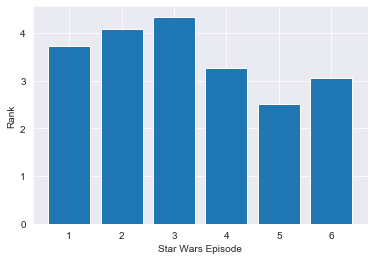

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1,7), star_wars[star_wars.columns[9:15]].mean())
plt.ylabel('Rank')
plt.xlabel('Star Wars Episode')

Remember, 1 is the highest ranking and 6 is the lowest. It looks like most respondents like Episode V the best. In general, the original trilogy is ranked higher than the second trilogy. I'll now compare the ranking to the number of people who have seen each movie. 

## Analysis: Most Viewed

In [163]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

Text(0.5, 0, 'Star Wars Episode')

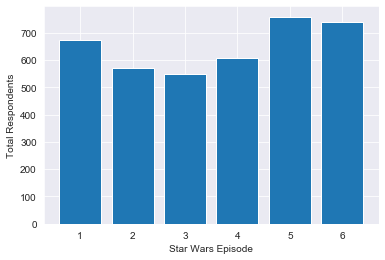

In [164]:
plt.bar(range(1,7), star_wars[star_wars.columns[3:9]].sum())
plt.ylabel('Total Views')
plt.xlabel('Star Wars Episode')

These responses correlate well with the ranking, most respondents have seen Episode V, and more respondents have seen the original trilogy than the second trilogy. 

## Analysis: Fans vs Not Fans

I know which movies the survey population as a whole has ranked the highest. Now I can examine how certain segments of the survey population responded. There are several columns that segment the data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` - True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?` - Yes or No
- `Gender` - Male or Female

I'll split the data based on weather a respondent considers themselves a star wars fan

In [165]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

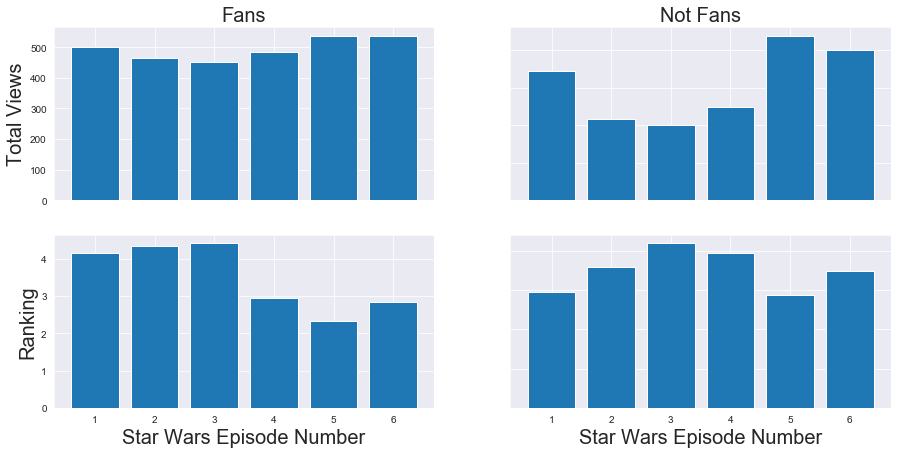

In [166]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
axs[0, 0].bar(range(1,7), fans[fans.columns[3:9]].sum())
axs[0, 0].set_title('Fans', size=20)
axs[0, 0].set(ylabel='Total Views')
axs[0, 0].yaxis.label.set_size(20)
axs[0, 1].bar(range(1,7), not_fans[not_fans.columns[3:9]].sum())
axs[0, 1].set_title('Not Fans', size=20)
axs[1, 0].bar(range(1,7), fans[fans.columns[9:15]].mean())
axs[1, 0].set(ylabel='Ranking')
axs[1, 0].yaxis.label.set_size(20)
axs[1, 1].bar(range(1,7), not_fans[not_fans.columns[9:15]].mean())
#axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='Star Wars Episode Number')
    ax.xaxis.label.set_size(20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Star Wars Episode I is viewed very differently between those who are fans and those who are not fans of Star Wars. Fans consider Episode I, II and III to be the worst movies. They are almost all tied for last place in ranking and ranked considerably lower than the original Star Wars movies (Episodes IV-VI). However, those who are not fans of Star Wars rank Episode I as the second best, and almost tied with Episode V, the fans best ranked movie.

## Conclusions
While there is still more cleaning and data exploration to do, this seems like a good place to stop, because most next steps will not require new processes or codes.